Welcome to my kernel in black friday dataset.

in this kernel i will try to explain some mysterious features in this dataset, and also i will do some EDA and some visualization.

if you have any suggest,advice or correction please don't hesitate to write it, i think it will be very helpful for me.

we will go through these topics:

         1- descriptive data analysis

         2- product categories explaination

         3- Occupation explaination

         4- Visualization
         
         5- Linear Regression With Pytorch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
import seaborn as sns
#sns.set(style="whitegrid")


In [3]:
train = pd.read_csv("../input/black-friday/train.csv")
train = train.drop(["User_ID","Product_ID"] , axis = 1)
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 10)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [6]:
train.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**So the only features that have null values are "Product_Category_2" and "Product_Category_3" ,after filling them we will go through some descriptive statistics**

In [7]:
train[train.duplicated() ].shape

(5261, 10)

In [8]:
train.describe(include="object")

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068
unique,2,7,3,5
top,M,26-35,B,1
freq,414259,219587,231173,193821


In [9]:
print(train["Product_Category_1"].unique())
print(train["Product_Category_2"].unique())
print(train["Product_Category_3"].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


**we will fill "Product_Category_2" and "Product_Category_3" with zero, i will explain why in Product categories's section** 

In [10]:
train["Product_Category_2"].fillna(0,inplace=True)
train["Product_Category_3"].fillna(0,inplace=True)

train["Product_Category_2"] = train["Product_Category_2"].astype('int64')
train["Product_Category_3"] = train["Product_Category_3"].astype('int64')

In [11]:
train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## 1- descriptive data analysis

In [12]:
from sklearn import preprocessing

def preprocessing_train(df,column):

    le = preprocessing.LabelEncoder()

    df[column] = le.fit_transform(df[column])

In [13]:
preprocced_data = train.copy()

preprocessing_train(preprocced_data,"Gender")
preprocessing_train(preprocced_data,"Age")
preprocessing_train(preprocced_data,"City_Category")
preprocessing_train(preprocced_data,"Stay_In_Current_City_Years")

#### The five-number summary is a set of descriptive statistics that provides information about a dataset. It consists of the five most important sample percentiles:

the sample minimum (smallest observation)

the lower quartile or first quartile

the median (the middle value)

the upper quartile or third quartile

the sample maximum (largest observation)

We can see these five numbers with boxplot or violinplot as follows:

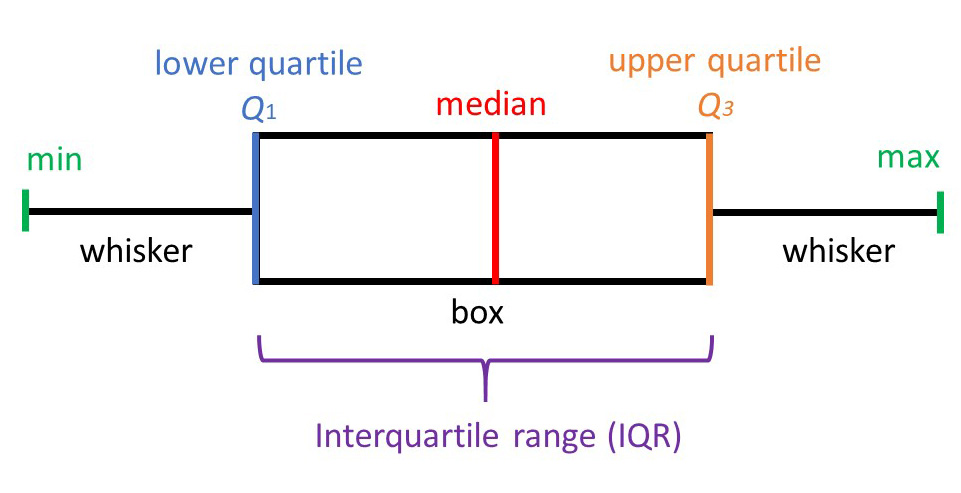

### without Purchase

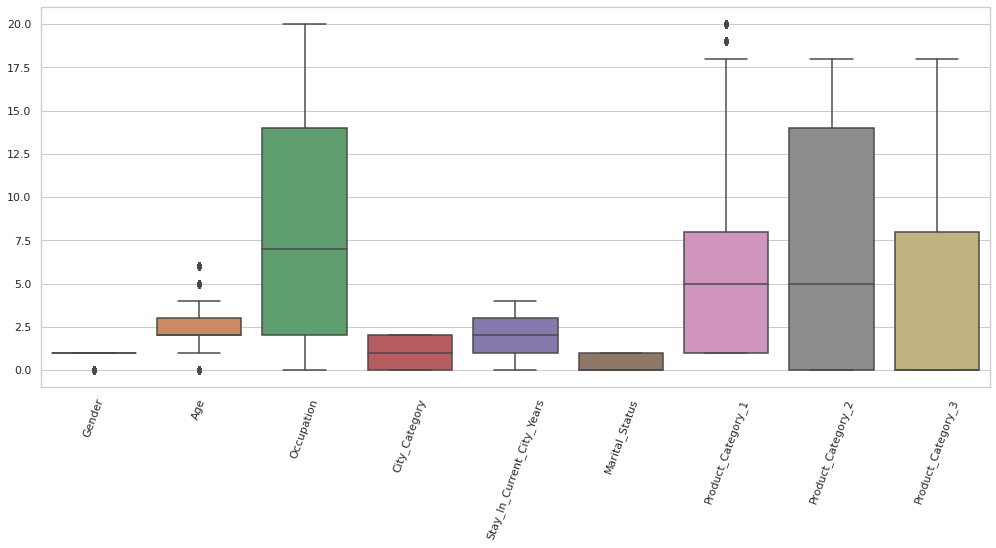

In [14]:
plt.figure(figsize=(17, 7))

sns.set(style="whitegrid")

sns.boxplot(data=preprocced_data.drop("Purchase",axis=1))

plt.tick_params(axis='x', rotation=70)

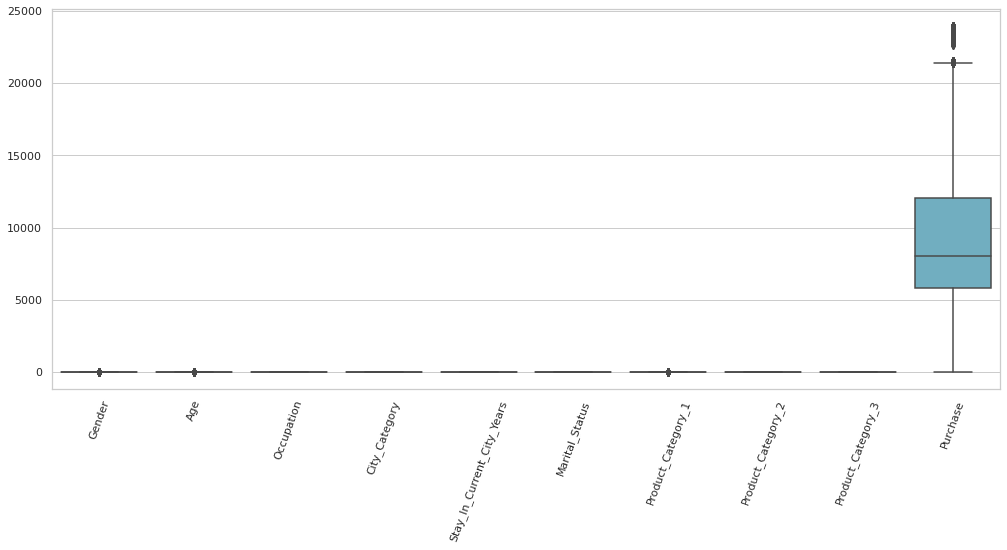

In [15]:
plt.figure(figsize=(17, 7))

sns.set(style="whitegrid")

sns.boxplot(data=preprocced_data)

plt.tick_params(axis='x', rotation=70)

Text(0.5, 1.0, 'Purchase violinplot')

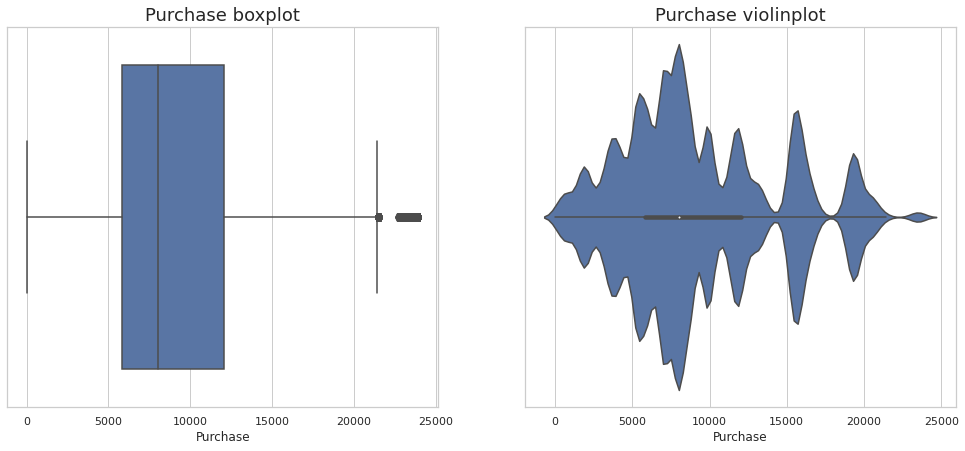

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[17,7])

sns.set(style="whitegrid")

sns.boxplot(x = train["Purchase"],ax=ax[0]).set_title("Purchase boxplot", fontsize=18)

sns.violinplot(train["Purchase"],ax=ax[1]).set_title("Purchase violinplot", fontsize=18)

In [17]:
train.describe(include="all")

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,6.735436,3.841941,9263.968713
std,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,6.215492,6.250712,5023.065394
min,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,12.000000
25%,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,8.000000,12054.000000


**lets see the skewness of data**

**skewness = 0 : normally distributed.**

**skewness > 0 : more weight in the left tail of the distribution.**

**skewness < 0 : more weight in the right tail of the distribution.**

Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2    0.310021
Product_Category_3    1.184926
Purchase              0.600140
dtype: float64


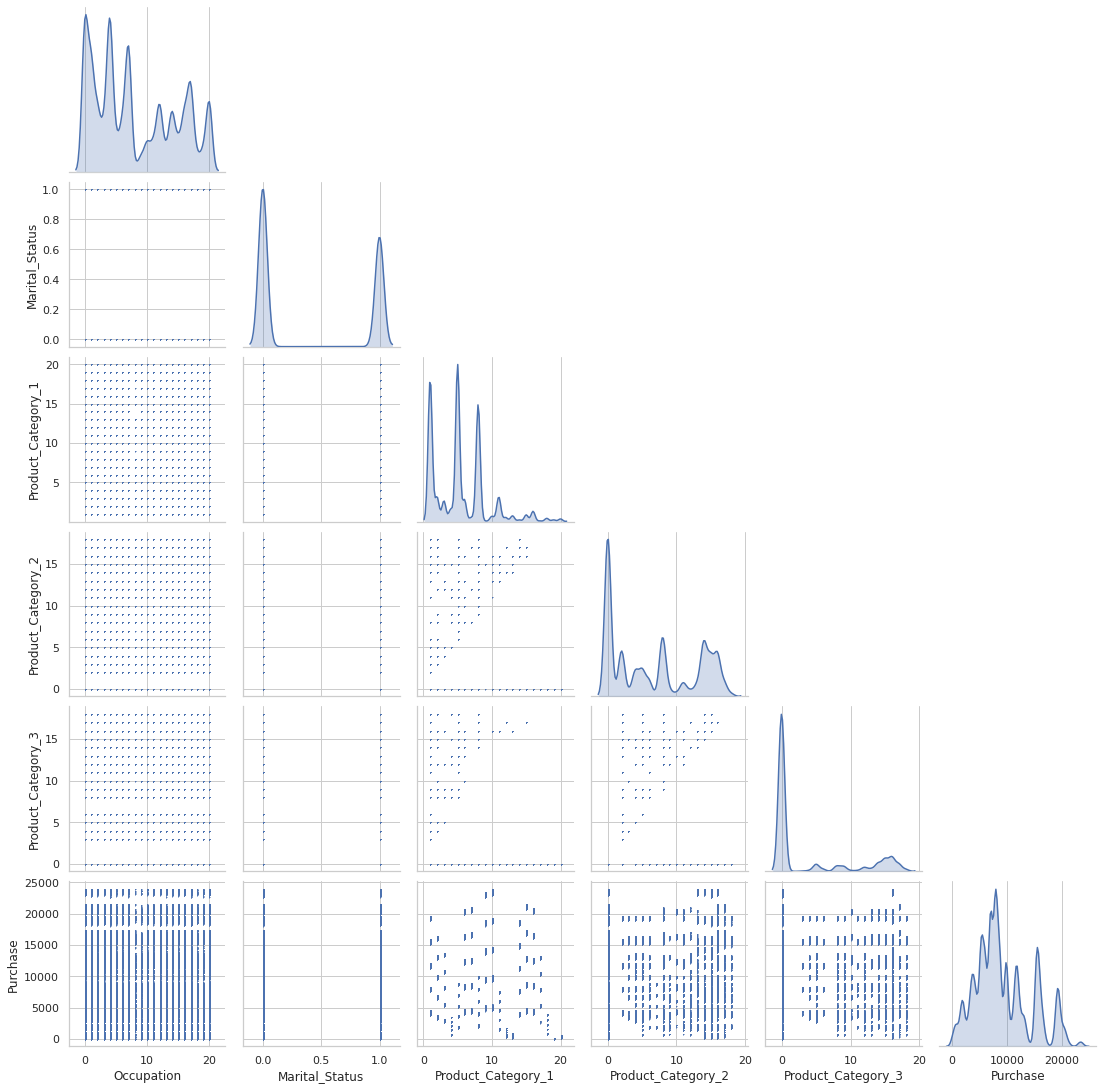

In [18]:
print(train.skew())
sns.pairplot(train,
             diag_kind="kde",
             corner=True,
             markers="+",
             plot_kws=dict(s=1, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))


### Now let's see the correlation between features

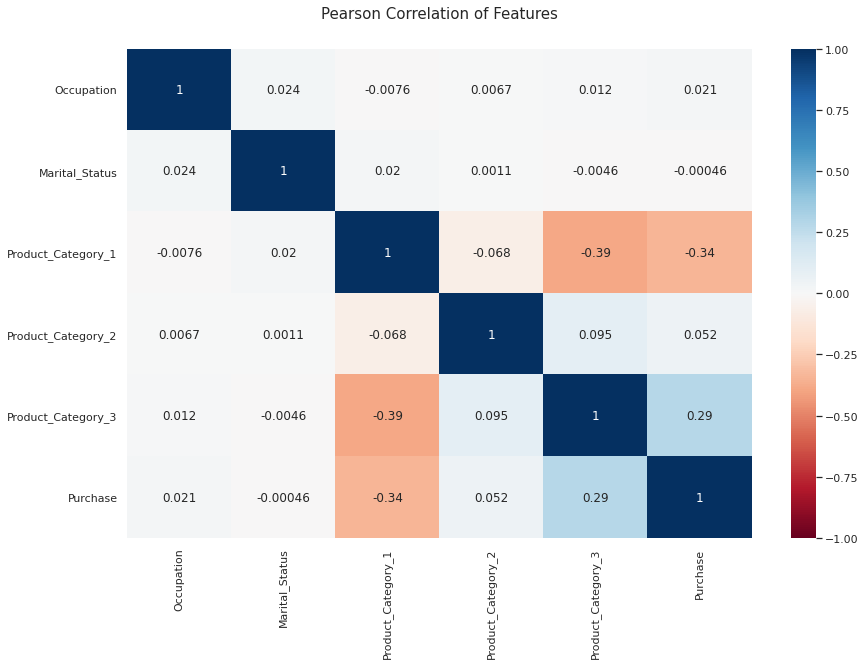

In [19]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

## 2- product categories explaination

**So, the product categories features are mysterious and for me, the only explanation is that each product could lay under more than one category and this explain why there are some products have value in each one of the 3 categories and others lay under "Product_Category_1" only, and that's why i filled nan values with zeros**

**also exploring products that have the same value in each one of the 3 product categories gives us different purchase value as follows**

In [20]:
prod_cat = train[train["Product_Category_1"] == 5]
prod_cat = prod_cat[prod_cat["Product_Category_2"] == 8] 
prod_cat[prod_cat["Product_Category_3"] == 14]

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
14,F,51-55,9,A,1,0,5,8,14,5378
28,M,26-35,17,C,0,0,5,8,14,5391
141,M,26-35,7,B,2,1,5,8,14,3702
200,M,26-35,3,B,0,0,5,8,14,6922
527,M,46-50,0,C,4+,1,5,8,14,3746
...,...,...,...,...,...,...,...,...,...,...
545573,F,36-45,20,B,4+,1,5,8,14,3446
545602,F,26-35,0,B,1,1,5,8,14,7016
545685,F,46-50,17,C,1,0,5,8,14,7143
545779,M,46-50,1,B,1,1,5,8,14,6991


In [21]:
prod_cat["Purchase"].value_counts()

7159    52
7126    51
7027    50
6940    49
6945    48
        ..
2031     1
1945     1
2051     1
1980     1
1914     1
Name: Purchase, Length: 1708, dtype: int64

**Now, let's see difference between products categories, i have used countplot for each individual category and scatterplot between them and Purchase feature**

**also calculated the correlation between each category and Purchase**


In [22]:
def Countplot_with_hue(df , x , y ,hue ,ax ,title):
    
    plt.figure(figsize=(15, 7))

    sns.countplot(x=x, y=y , hue=hue, data=df, ax=ax).set_title(title, fontsize=18)
    
    
    
from scipy import stats

def p_value_and_pearson_coeff(col1 ,col2):
    
    pearson_coef , p_value = stats.pearsonr(train[col1],train[col2])
    
    print("pearson_coef = ",pearson_coef)
    
    print("p_value = ",p_value)
    

In [23]:
def product_and_purchase(col1 ,col2 ,color , ax1 , ax2 ):
    
    print(col1 + " and Purchase")
    
    p_value_and_pearson_coeff(col1,col2)
    
    print("-"*100)

    train[col1].value_counts().plot(kind='bar',color = color,ax=ax1, title=col1+" count")
    
    train.plot(kind='scatter',x=col1,y=col2,color = color,marker="+" ,ax=ax2, title=col1)

Product_Category_1 and Purchase
pearson_coef =  -0.3437033459199081
p_value =  0.0
----------------------------------------------------------------------------------------------------
Product_Category_2 and Purchase
pearson_coef =  0.05228771611534879
p_value =  0.0
----------------------------------------------------------------------------------------------------
Product_Category_3 and Purchase
pearson_coef =  0.28850053454902813
p_value =  0.0
----------------------------------------------------------------------------------------------------


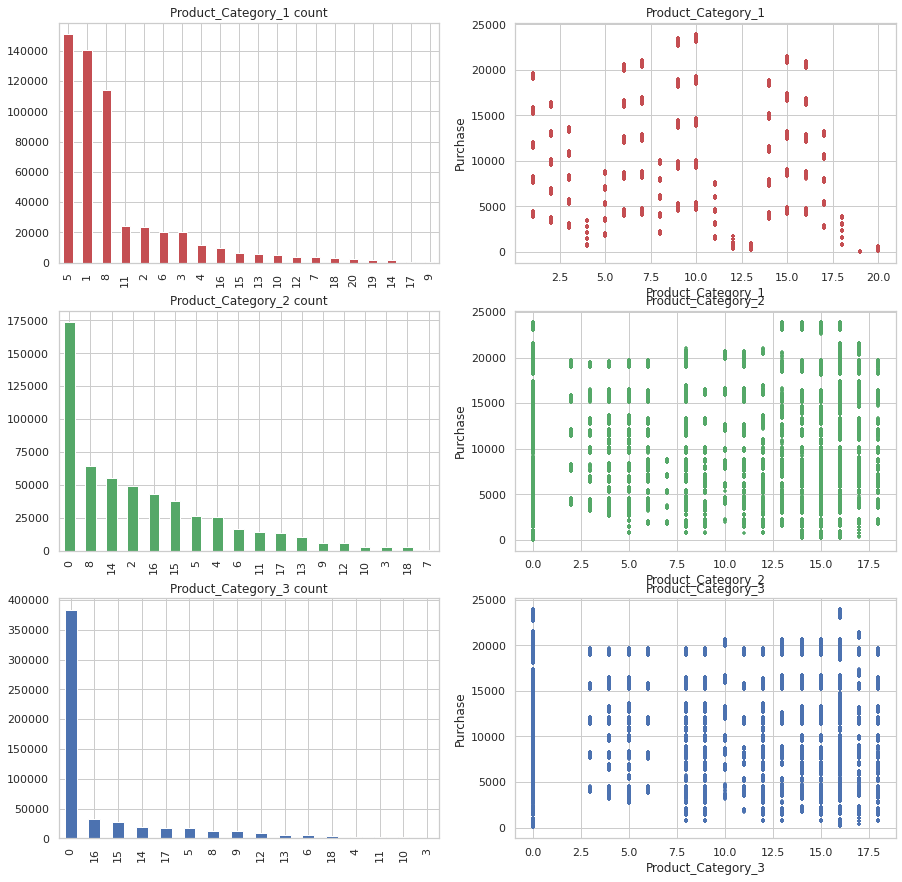

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

product_and_purchase("Product_Category_1" ,"Purchase", "r" , axes[0,0] ,axes[0,1])

product_and_purchase("Product_Category_2" ,"Purchase", "g" , axes[1,0] ,axes[1,1])

product_and_purchase("Product_Category_3" ,"Purchase", "b", axes[2,0] ,axes[2,1])

## 3- Occupation explaination

**after some searching it seems that this featuer is about the classification of job status like Management Occupations, Business and Financial Operations Occupations, Computer and Mathematical Occupations, etc. according to U.S. bureau of labour statistics https://www.bls.gov/soc/2018/major_groups.htm**

**unfortunaitlly i can't find the equivalnt group name for each number in Occupation feature so i will work with what i have**


In [25]:
print("Occupation and Purchase")
p_value_and_pearson_coeff("Occupation","Purchase")


Occupation and Purchase
pearson_coef =  0.02083261692461262
p_value =  7.259684177708665e-54


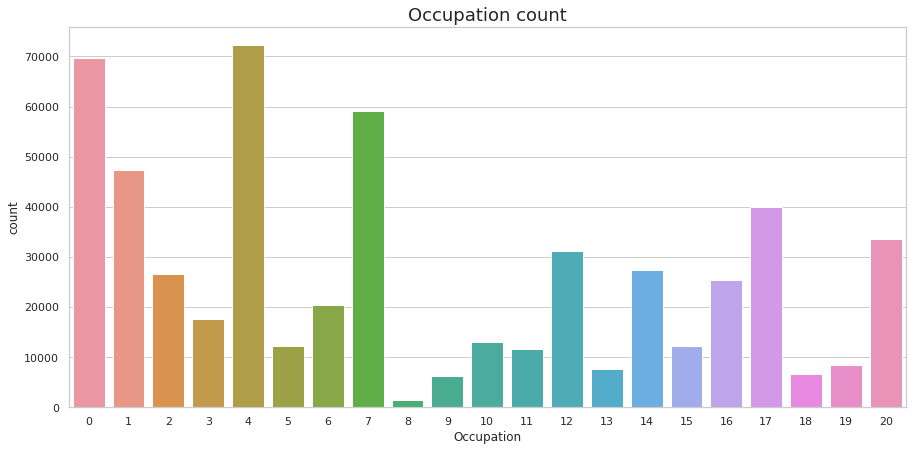

In [26]:
#Countplot_with_hue(df , x , y ,hue ,ax ,title)
Countplot_with_hue(train , "Occupation", None ,None ,None ,"Occupation count")

## 4- Visualization

**now let's go and see some visuals like count of each feature and relation between some of them**

In [27]:
sorted_data = train.sort_values(by=['City_Category', 'Age',"Stay_In_Current_City_Years"] , ascending=True)

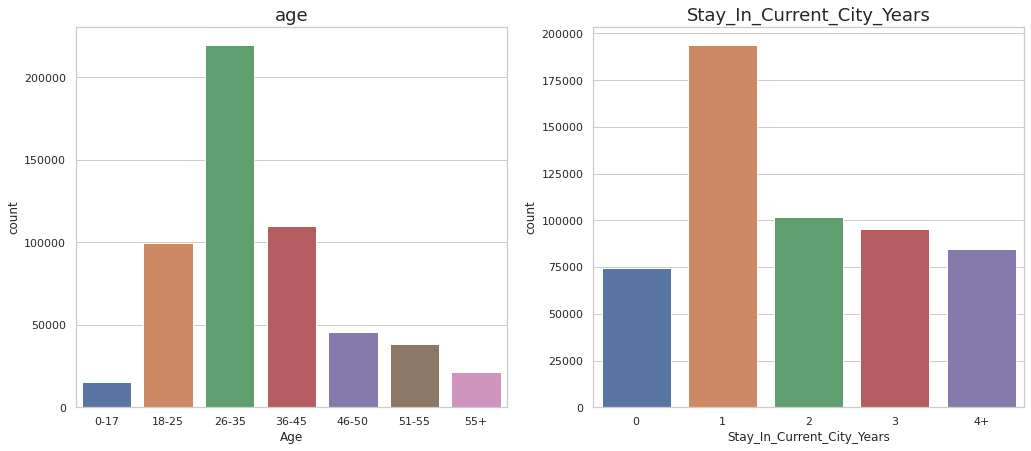

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[17,7])

Countplot_with_hue(sorted_data , "Age",None ,None,axes[0] ,"age")
Countplot_with_hue(sorted_data , "Stay_In_Current_City_Years",None ,None ,axes[1],"Stay_In_Current_City_Years")


In [29]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

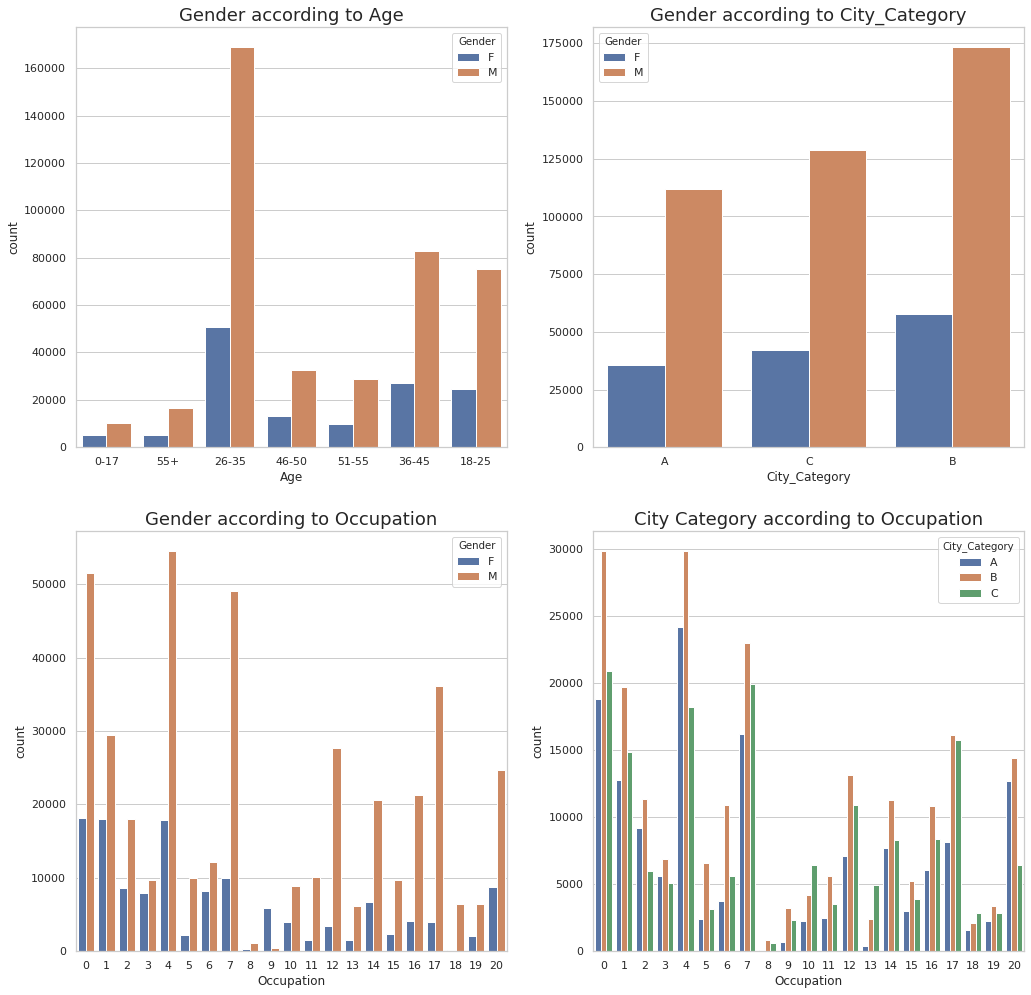

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[17, 17])

Countplot_with_hue(train , "Age" , None ,"Gender",axes[0,0],"Gender according to Age")
Countplot_with_hue(train , "City_Category" , None ,"Gender",axes[0,1],"Gender according to City_Category")
Countplot_with_hue(sorted_data , "Occupation" , None ,"Gender",axes[1,0],"Gender according to Occupation")
Countplot_with_hue(sorted_data , "Occupation" , None ,"City_Category",axes[1,1],"City Category according to Occupation")



In [31]:
def pie_chart(column ,explode , labels):
    plt.figure(figsize=(12, 6))


    plt.pie(train[column].value_counts(),
            explode=explode,    #explode=[0.04,0]
            startangle=90, 
            autopct='%1.1f%%',
            labels=labels, #labels=['Males','Females']
            colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
            pctdistance=.6,
            textprops={'fontsize': 20})




    centre_circle = plt.Circle((0,0),0.7,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')  
    plt.tight_layout()
    plt.show()




In [32]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

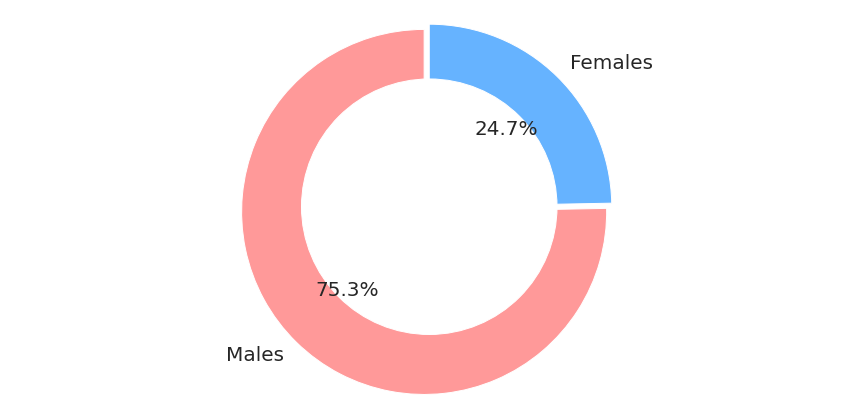

In [33]:
pie_chart("Gender" ,[0.04,0] , ['Males','Females'])

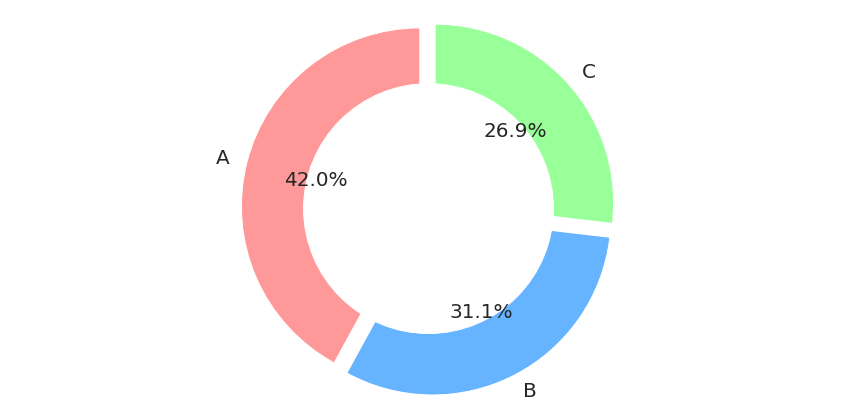

In [34]:
pie_chart("City_Category" ,[0.05,0.05,0.05] , ['A','B',"C"])

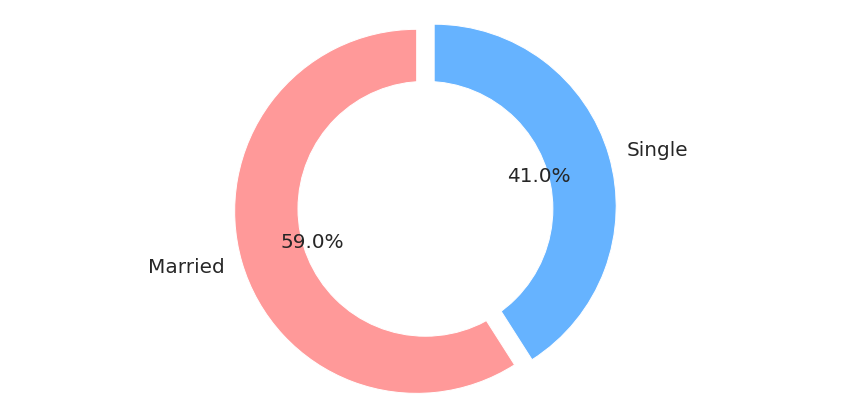

In [35]:
pie_chart("Marital_Status" ,[0.05,0.05] , ["Married","Single"])

## 5- Linear Regression With Pytorch

In [36]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [37]:
le = preprocessing.LabelEncoder()

train["Age"] = le.fit_transform(train["Age"])
train["Stay_In_Current_City_Years"] = le.fit_transform(train["Stay_In_Current_City_Years"])
train["City_Category"] = le.fit_transform(train["City_Category"])


train = pd.get_dummies(train, prefix=["Gender"])


In [38]:
train.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,0,10,0,2,0,3,0,0,8370,1,0
1,0,10,0,2,0,1,6,14,15200,1,0
2,0,10,0,2,0,12,0,0,1422,1,0
3,0,10,0,2,0,12,14,0,1057,1,0
4,6,16,2,4,0,8,0,0,7969,0,1


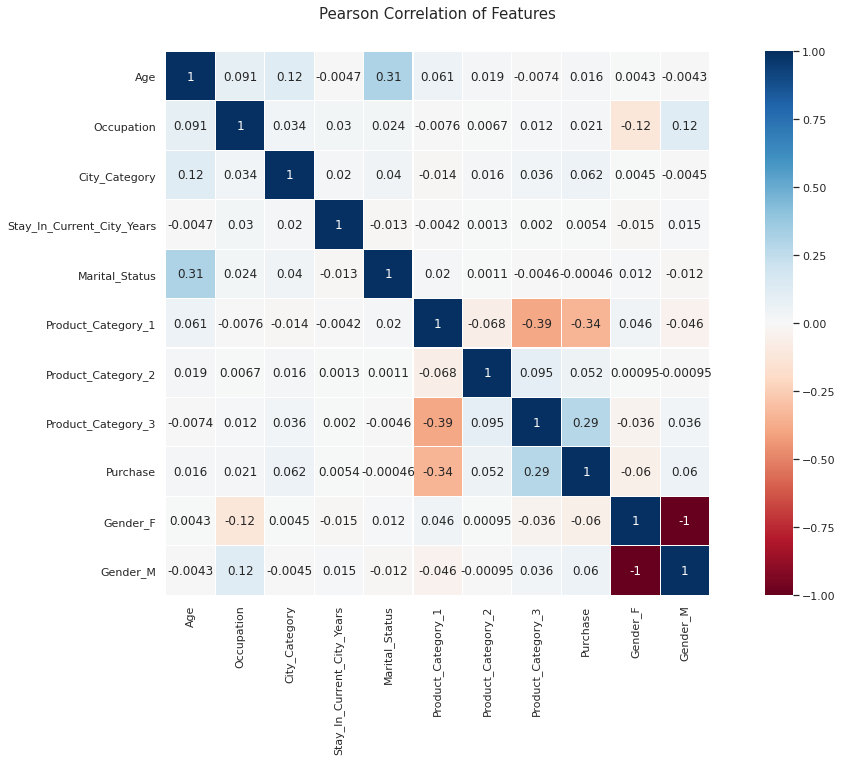

In [39]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

this is my first time working with pytorch so i searched a lot about it and i found a good simple tutorial to apply a linear regression with Pytorch 

video link: https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7

In [40]:
# Imports
import torch
import torchvision
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any para/'meters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

In [41]:
# 0) Prepare data
features = train.drop("Purchase",axis = 1)
target = train["Purchase"]

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# cast to float Tensor
X = torch.from_numpy(np.asarray(features_scaled).astype(np.float32))
y = torch.from_numpy(np.asarray(target_scaled).astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [43]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 1
    
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 144)
        self.fc2 = nn.Linear(144, 72)
        self.fc3 = nn.Linear(72, output_size)

        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        #x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x
    
input_size = n_features
output_size = 1
#model = NN(input_size, output_size)
model = Regressor()

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    
    # Backward pass and update
    loss.backward()
    optimizer.step()
    # zero grad before new step
    optimizer.zero_grad()


    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 0.9845
epoch: 20, loss = 0.9712
epoch: 30, loss = 0.9609
epoch: 40, loss = 0.9521
epoch: 50, loss = 0.9443
epoch: 60, loss = 0.9374
epoch: 70, loss = 0.9311
epoch: 80, loss = 0.9253
epoch: 90, loss = 0.9199
epoch: 100, loss = 0.9147
